# Andrucci Federico
## Matricola 

1. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if
any (5pt)
2. a classification model using a method of your choice with the schema "train-validationtest" exploring an appropriate range of parameter values (5pt)
3. the optimal parameter(s) (5pt)
4. a scatter plot of the test set using a pair of attributes of your choice with the class as
colour (5pt)
5. ... and the good/bad prediction as the point style (5pt)


In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# Variables
filename = 'exam_2020_01_07_data.csv'
separator = ','
target = 'Class'
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)


In [2]:
# Load the csv file and check that everything is in a good shape

df = pd.read_csv(filename, sep=separator)
df.head()

,C00,C01,C02,C03,C04,Class
0,1.855416,0.466367,-0.176765,1.546514,0.149219,c
1,-0.107873,-0.136792,1.551591,-0.813810,1.357674,a
2,2.712560,-0.495846,1.397077,1.483562,1.656526,b
3,-2.166084,-0.582271,0.353011,-1.864210,-2.267033,b
4,2.848831,-0.507369,1.661752,1.466627,1.938519,b


### 1. A pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if any (5pt)

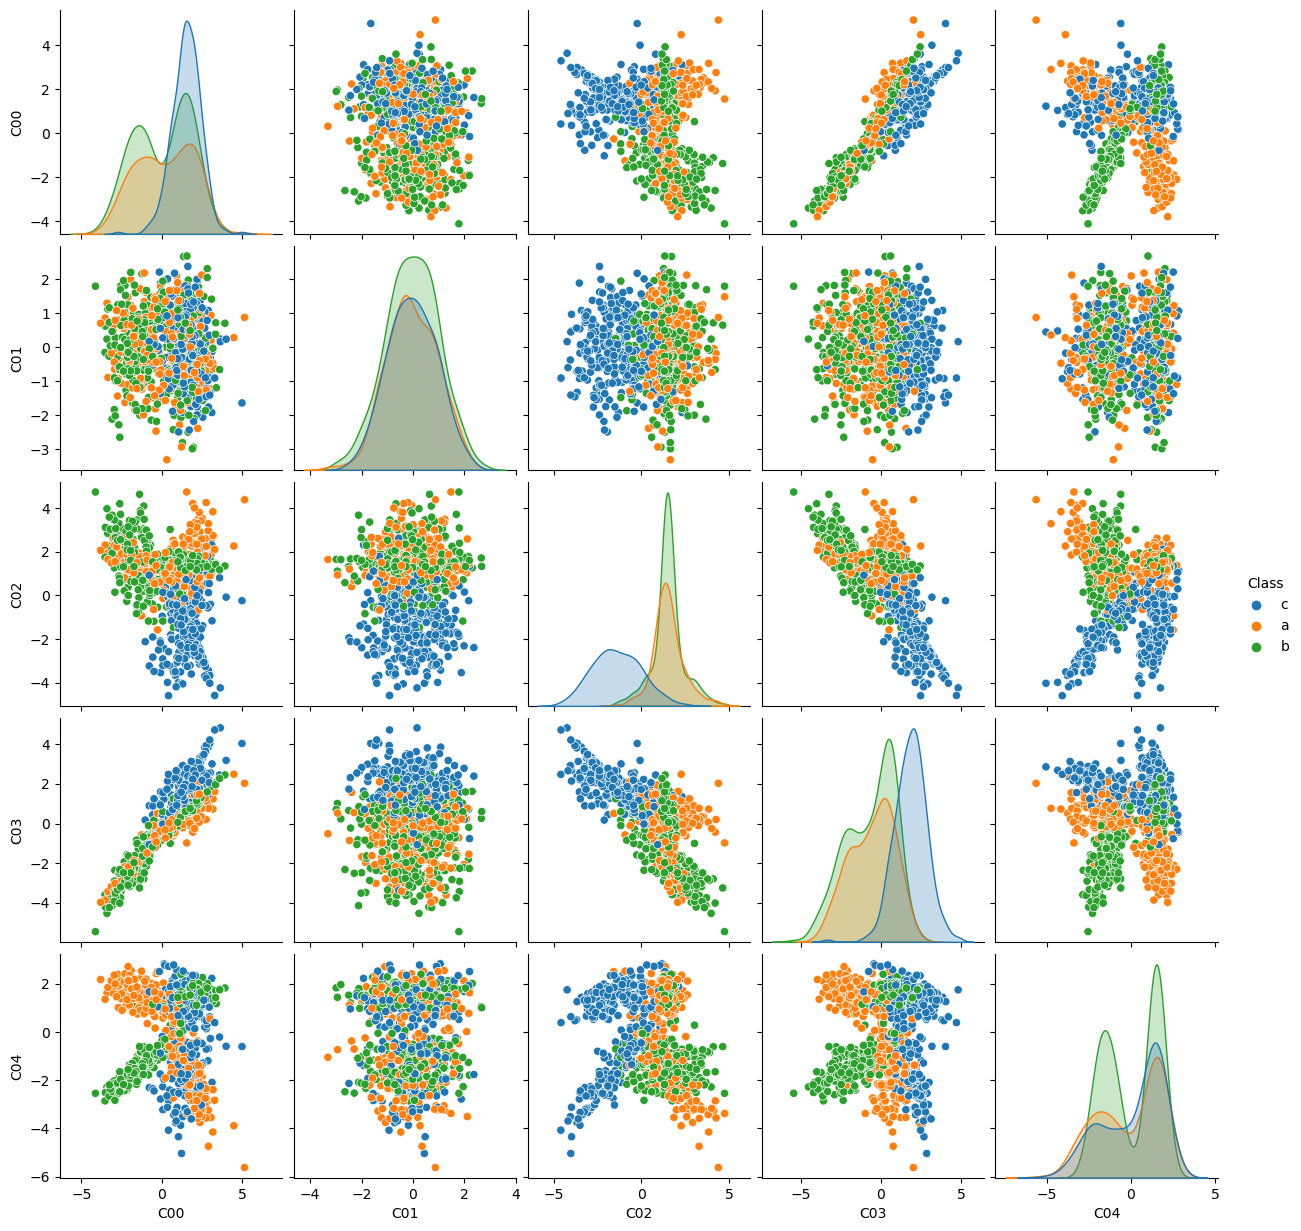

In [3]:
sns.pairplot(df, hue=target)

The pairplots don't seem to show any particular pattern in the data.

### 2. A classification model using a method of your choice with the schema "train-validation-test" exploring an appropriate range of parameter values (5pt)

For this classification assignment, we will use a Decision Tree.

We start by dividing the features matrix and the target column, as follows:

In [4]:
X = df.drop(target, axis=1)
y = df[target]

We now divide the data in training and test set by means of the `train_test_split` function

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=2/3, random_state=random_state)
print(f"Training set contains {Xtrain.shape[0]} items.")
print(f"Testing set contains {Xtest.shape[0]} items.")

Training set contains 666 items.
Testing set contains 334 items.


We now instantiate a Decision Tree and fit it on the training data.

We then use it to predict the training values, using the `accuracy_score` function to see the accuracy on the training set

In [8]:
model = tree.DecisionTreeClassifier(criterion='entropy', random_state=random_state)
model.fit(Xtrain, ytrain)

train_set_predictions = model.predict(Xtrain)
train_set_accuracy = accuracy_score(ytrain, train_set_predictions) * 100

print(f"The accuracy on the training set is {train_set_accuracy:.2f}%")

The accuracy on the training set is 100.00%


To have a more meaningful result, we will try it on the test set as well, to obtain a "baseline" value for the performance of our classifier

In [10]:
test_set_predictions = model.predict(Xtest)
test_set_accuracy = accuracy_score(ytest, test_set_predictions) * 100

print(f"The accuracy on the testing set is {test_set_accuracy:.2f}%")

The accuracy on the testing set is 84.13%


Since our assignment is to use the train-validation-test schema, we will split once more the test data into a test and validation set

In [12]:
Xtrain_t, Xval, ytrain_t, yval = train_test_split(Xtest, ytest, random_state=random_state)
print(f"Testing set contains {Xtest.shape[0]} items.")
print(f"Validation set contains {Xval.shape[0]} items.")

Testing set contains 334 items.
Validation set contains 84 items.


Now we can save the depth of the tree with default hyperparameters. This way, we can vary the depths in order to see what is the best fit for our data.

In [16]:
fitted_max_depth = model.tree_.max_depth
depths = range(1, fitted_max_depth + 1)

In [24]:
scores = []

for depth in depths:
    # Create a classifier with limited depth
    model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=random_state)
    # Fitting the model on the test data
    model.fit(Xtrain_t, ytrain_t)
    # Predicting the target and save the accuracy
    prediction = model.predict(Xval)
    score = accuracy_score(yval, prediction) * 100
    scores.append(score)

### 3. The optimal parameter(s) (5pt)

We now have a look at the accuracy scores that we obtained in the previous step

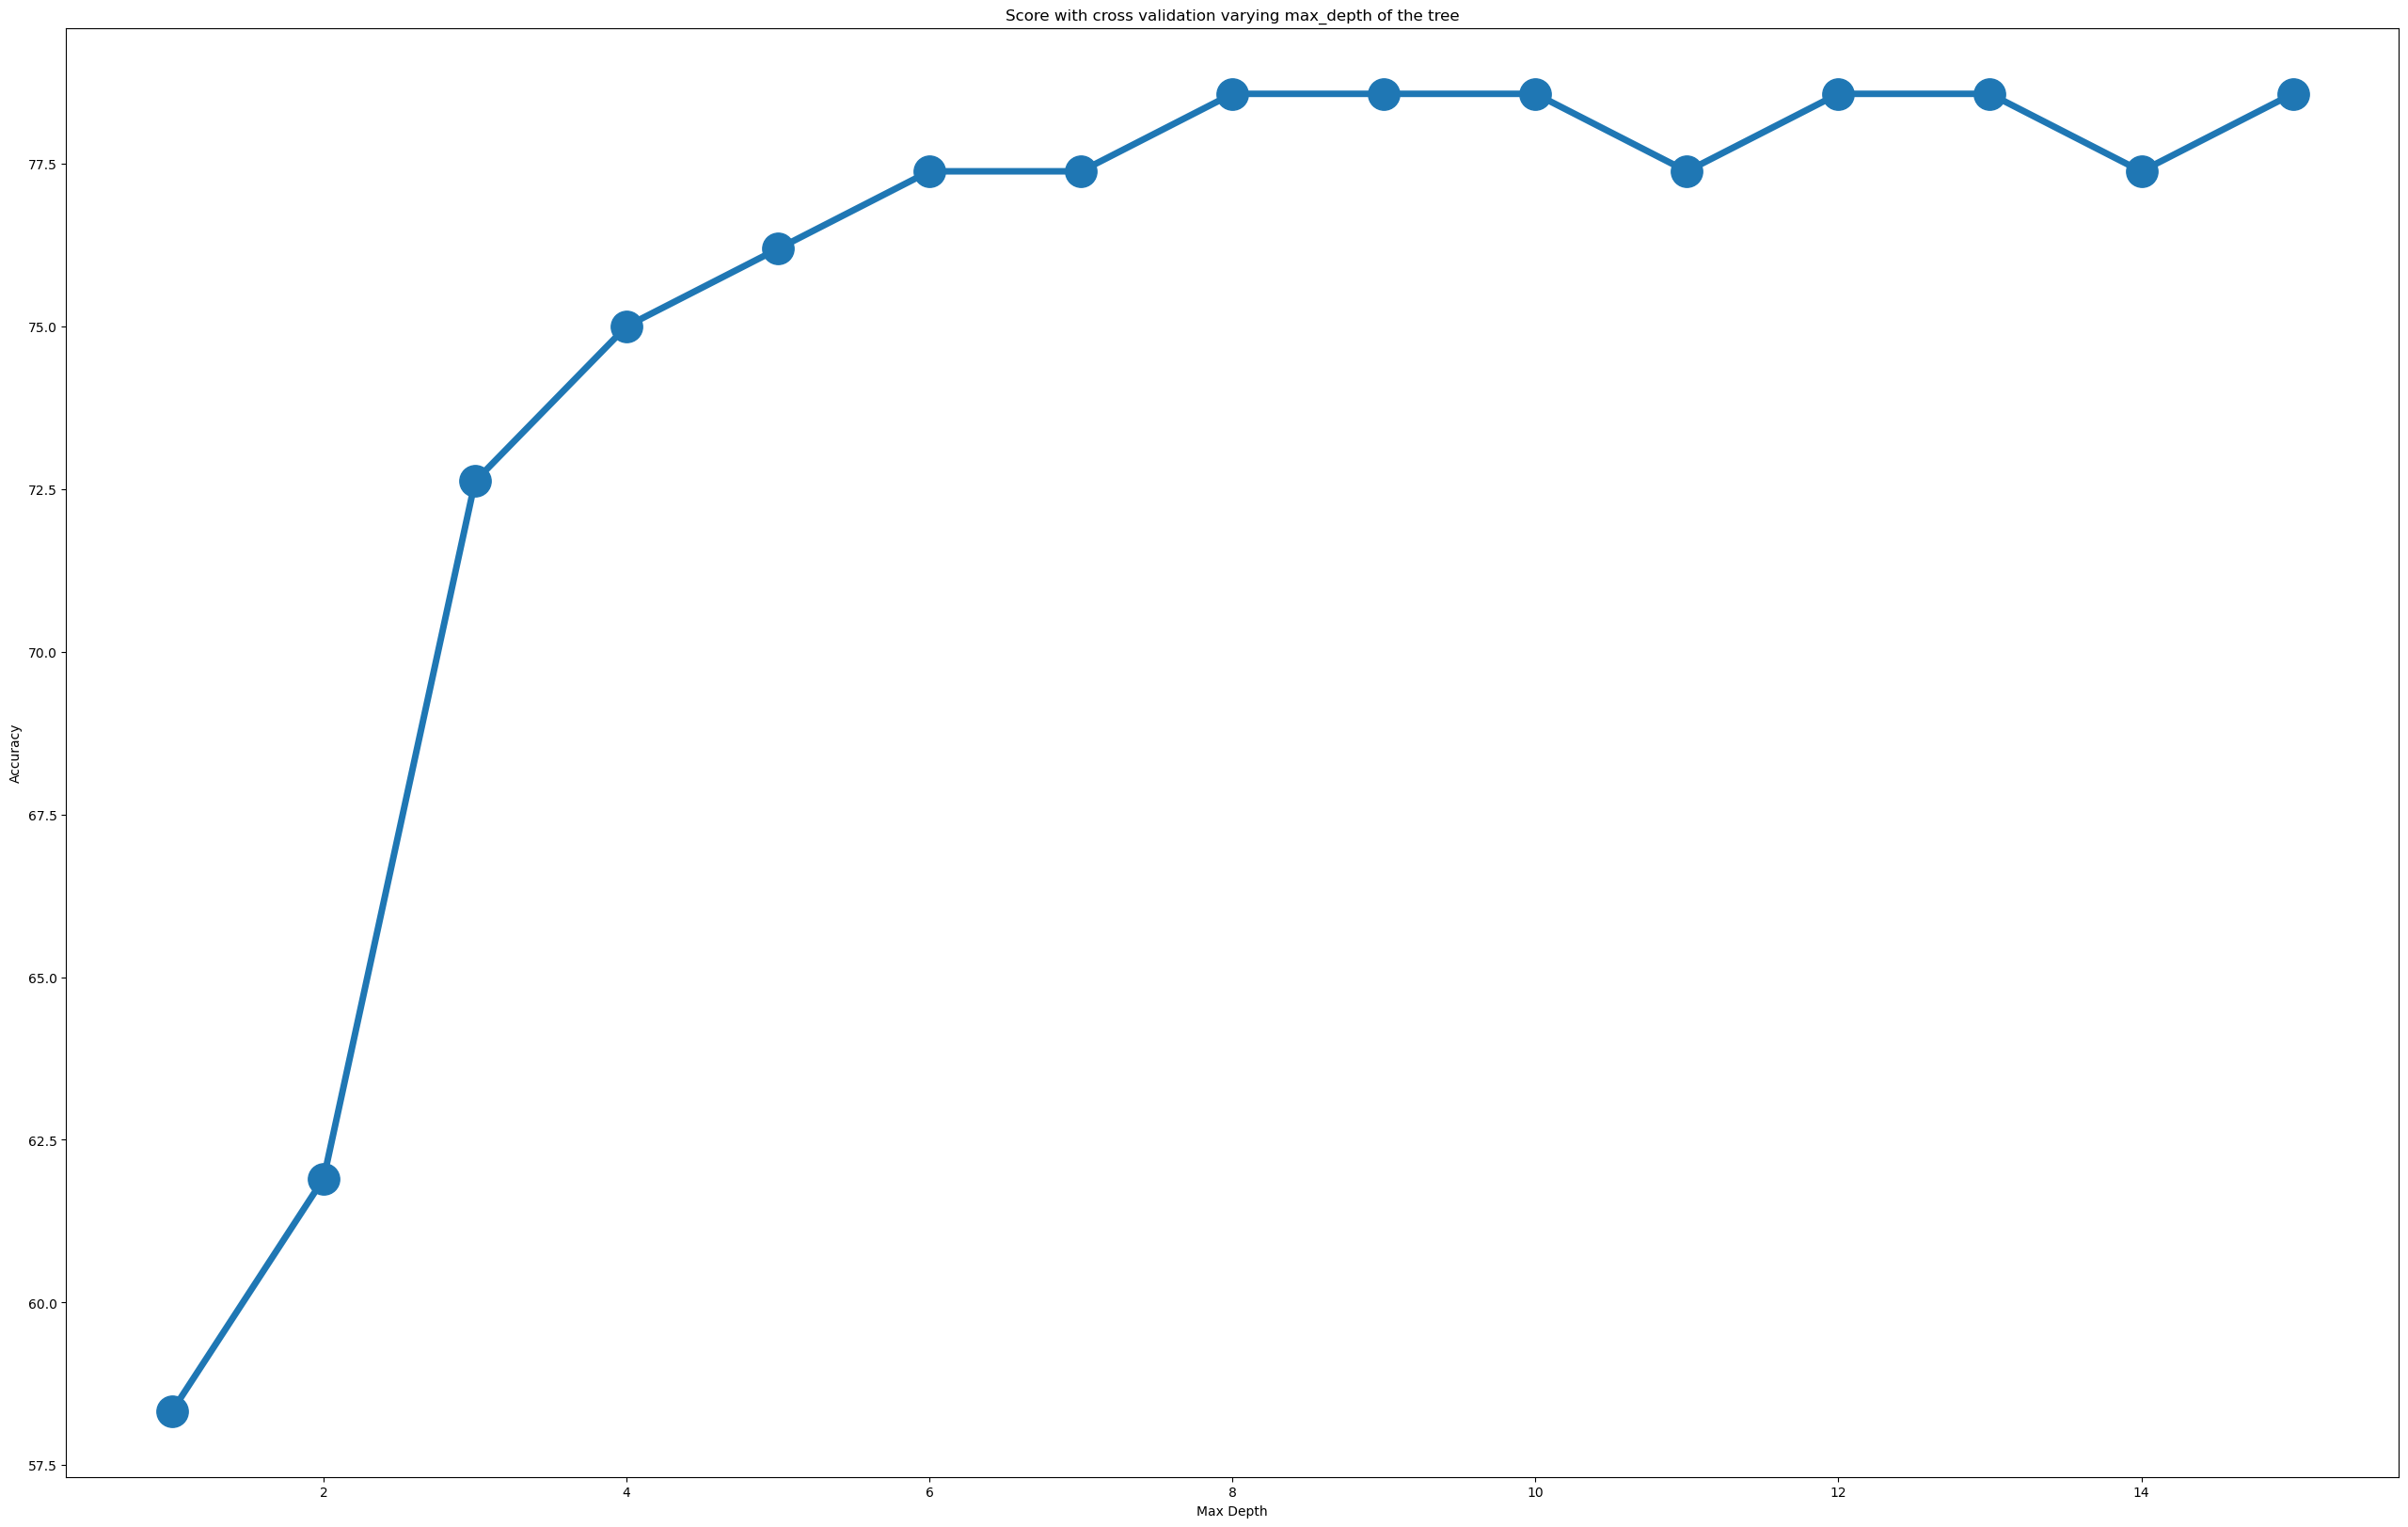

In [25]:
plt.figure(figsize=(32, 20))
plt.plot(depths, scores, '-o', linewidth=5, markersize=24)
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.title('Score with cross validation varying max_depth of the tree')
plt.show()

The best hyperparameter configuration is the one that maximises the accuracy

In [26]:
best_depth = depths[np.argmax(scores)]

# We must remove 1 from best depth in order to obtain the correct score, as its "zero" value is 1
print(f"The best depth parameter was {best_depth}, with an accuracy of {scores[best_depth - 1]:.2f}%")

The best depth parameter was 8, with an accuracy of 78.57%


We now test our tuned hyperparameter on the old training data and compute its accuracy

In [27]:
model = tree.DecisionTreeClassifier(max_depth=best_depth, criterion='entropy', random_state=random_state)
model.fit(Xtrain, ytrain)
prediction = model.predict(Xtest)
accuracy = accuracy_score(ytest, prediction) * 100
print(f"The accuracy of the tuned Tree is {accuracy:.2f}%")

The accuracy of the tuned Tree is 84.13%


The results show that we obtained the same accuracy but with a smaller tree

In [28]:
print(f"The depth of the origina tree was {fitted_max_depth} and now is {best_depth}")

The depth of the origina tree was 15 and now is 8


### 4. A scatter plot of the test set using a pair of attributes of your choice with the class as colour (5pt)

Let us choose `C01` and `C02` as the attribute pair we will consider

<AxesSubplot:xlabel='C01', ylabel='C02'>

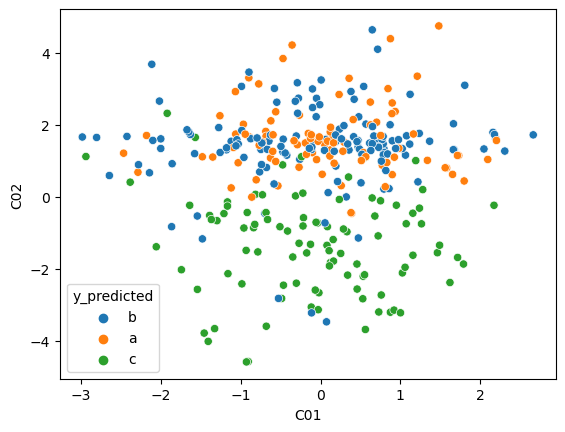

In [29]:
attributes = ['C01', 'C02']

df_test = Xtest.assign(y_predicted = prediction)
sns.scatterplot(x = attributes[0], y = attributes[1], data = df_test, hue = 'y_predicted')

We notice that the items of class `c` tend to be in the lower part of the plot

### 5 ... and the good/bad prediction as the point style (5pt)

<AxesSubplot:xlabel='C01', ylabel='C02'>

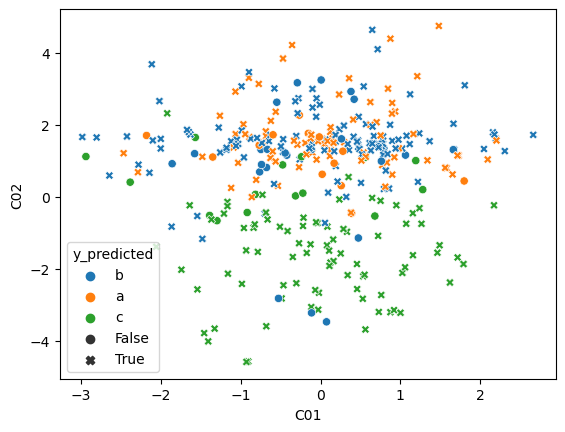

In [30]:
sns.scatterplot(x = attributes[0], y = attributes[1], data = df_test, hue = 'y_predicted', style = ytest == df_test['y_predicted'])